# OASIS TASK - 1
# SALES PREDICTION USING PYTHON
### Sales prediction means predicting how much of a product people will buy based on factors
### such as the amount you spend to advertise your product, the segment of people you
### advertise for, or the platform you are advertising on about your product.

### Typically, a product and service-based business always need their Data Scientist to predict
### their future sales with every step they take to manipulate the cost of advertising their
### product. So let’s start the task of sales prediction with machine learning using Python.

## IMPORTING THE LIRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING THE DATASET

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


## DROPPING THE UN-WANTED COLUMNS

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
data.shape

(200, 4)

In [12]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## CHECKING FOR NULL VALUES

In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [15]:
data[~data.duplicated()]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## INFO ABOUT THE DATA

In [22]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<AxesSubplot:xlabel='TV', ylabel='Count'>

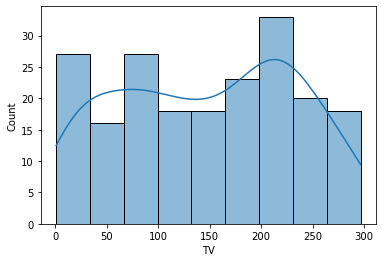

In [28]:
sns.histplot(data['TV'],kde=True)

<AxesSubplot:xlabel='Radio', ylabel='Count'>

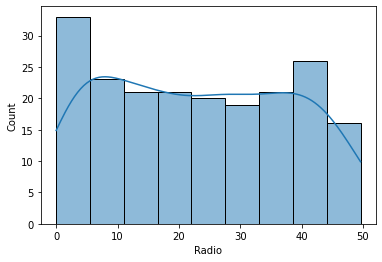

In [29]:
sns.histplot(data['Radio'],kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

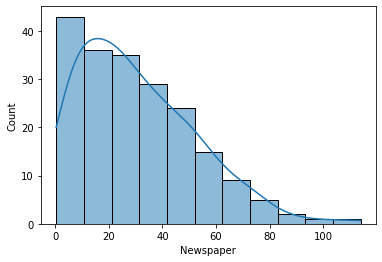

In [30]:
sns.histplot(data['Newspaper'],kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

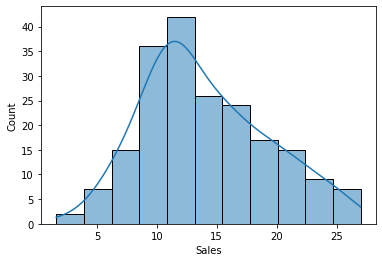

In [31]:
sns.histplot(data['Sales'],kde=True)

In [32]:
x=data.drop('Sales',axis=1)

In [54]:
y=data[['Sales']]

## SPLITTING THE DATA FOR TRANING AND TESTING

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [57]:
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train)

In [58]:
y_test=sc_y.transform(y_test)

## TRANING THE MODEL

In [61]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=15)
model.fit(x_train,y_train)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_7824/3432548962.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=15)

## PREDICTING THE RESULT

In [64]:
y_pred=model.predict(x_test)

## METRICS OF THE MODEL

In [65]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_pred,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R-Squared',metrics.r2_score(y_pred,y_test))

MAE: 0.13116648202584563
RMSE: 0.15429629984316587
R-Squared 0.9790725557667254


In [66]:
case1=sc_x.transform([[230.1,37.8,69.2]])

In [67]:
d1=model.predict(case1)

## PREDICTING THE RESULT FOR A GIVEN INPUT DATA

In [68]:
print(f"The Sales when TV={230}, Radio={37.8} and Newspaper={69.2} is {sc_y.inverse_transform(d1)}")

The Sales when TV=230, Radio=37.8 and Newspaper=69.2 is [21.97333333]
